<a href="https://colab.research.google.com/github/DaksheshGautam/Data-Practice/blob/main/FE_random_sample_impu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df = df[['survived', 'age', 'fare']]

In [6]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean()*100

,0
survived,0.00000
age,19.86532
fare,0.00000


In [8]:
X = df[[ 'age', 'fare']]
Y = df['survived']

In [9]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [10]:
X_train['age_imputed'] = X_train['age']
X_test['age_imputed'] = X_test['age']

In [11]:
X_train['age_imputed'][X_train['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
X_test['age_imputed'][X_test['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_test['age'].isnull().sum()).values

/tmp/ipython-input-1299363309.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_imputed'][X_train['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
/tmp/ipython-input-1299363309.py

In [12]:
X_train

,age,fare,age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,20.0
493,71.0,49.5042,71.0
527,NaN,221.7792,45.0


/tmp/ipython-input-1323519603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'], label = 'original', hist = False)
/tmp/ipython-input-1323519603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age_imputed'], label = 'imputed', hist =False)


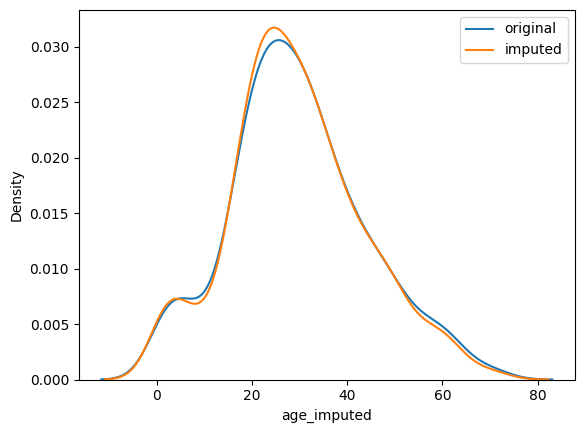

In [13]:
sns.distplot(X_train['age'], label = 'original', hist = False)
sns.distplot(X_train['age_imputed'], label = 'imputed', hist =False)
plt.legend()
plt.show()

In [14]:
print('original variance:', X_train['age'].var())
print('imputed variance:', X_train['age_imputed'].var())

original variance: 204.3495133904614
imputed variance: 195.93192808988798


In [16]:
X_train[['fare','age','age_imputed']].cov()

,fare,age,age_imputed
fare,2368.246832,71.512440,64.680103
age,71.512440,204.349513,204.349513
age_imputed,64.680103,204.349513,195.931928


<Axes: >

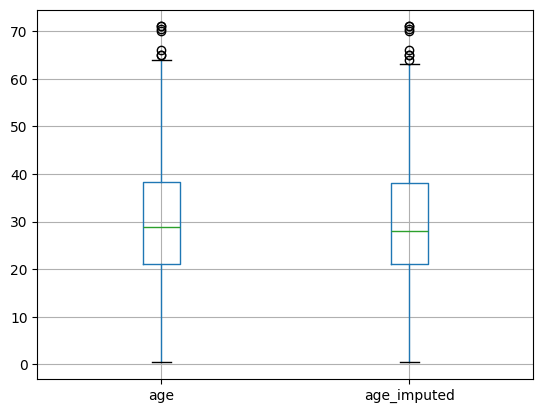

In [17]:
X_train[['age','age_imputed']].boxplot()

In [19]:
data = pd.read_csv('house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [22]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [23]:
X1 = data
Y1 = data['SalePrice']

In [24]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y1, test_size=0.2, random_state=2)

In [25]:
X_train1['GarageQual_imputed'] = X_train1['GarageQual']
X_test1['GarageQual_imputed'] = X_test1['GarageQual']
X_train1['FireplaceQu_imputed'] = X_train1['FireplaceQu']
X_test1['FireplaceQu_imputed'] = X_test1['FireplaceQu']

In [26]:
X_train1.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd


In [27]:
X_train1['GarageQual_imputed'][X_train1['GarageQual_imputed'].isnull()] = X_train1['GarageQual'].dropna().sample(X_train1['GarageQual'].isnull().sum()).values
X_test1['GarageQual_imputed'][X_test1['GarageQual_imputed'].isnull()] = X_train1['GarageQual'].dropna().sample(X_test1['GarageQual'].isnull().sum()).values

/tmp/ipython-input-3358666824.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train1['GarageQual_imputed'][X_train1['GarageQual_imputed'].isnull()] = X_train1['GarageQual'].dropna().sample(X_train1['GarageQual'].isnull().sum()).values


In [29]:
temp1 = pd.concat([
    X_train1['GarageQual'].value_counts()/len(X_train1['GarageQual'].dropna()),
    X_train1['GarageQual_imputed'].value_counts()/len(X_train1)
], axis = 1)
temp1.columns = ['original', 'imputed']

In [31]:
temp1

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [32]:
temp1 = pd.concat([
    X_train1['FireplaceQu'].value_counts()/len(X_train1['FireplaceQu'].dropna()),
    X_train1['FireplaceQu_imputed'].value_counts()/len(data)
], axis = 1)
temp1.columns = ['original', 'imputed']

In [33]:
temp1

,original,imputed
Gd,0.494272,0.206849
TA,0.412439,0.172603
Fa,0.040917,0.017123
Po,0.027823,0.011644
Ex,0.024550,0.010274


/tmp/ipython-input-1131394920.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train1[X_train1['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-1131394920.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train1[X_train1['Fireplace

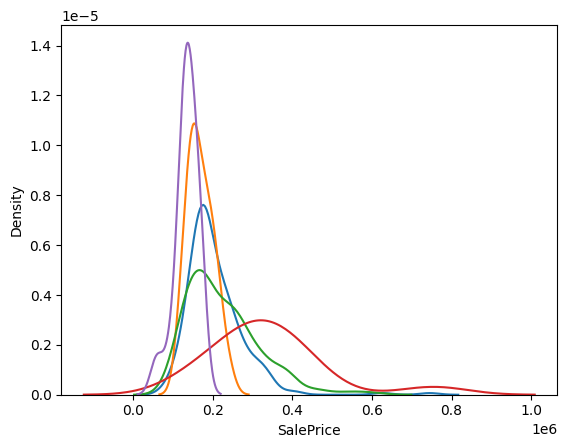

In [36]:
for category in X_train1['FireplaceQu'].dropna().unique():
    sns.distplot(X_train1[X_train1['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-841940100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train1[X_train1['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-841940100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train1[X_train1['Fir

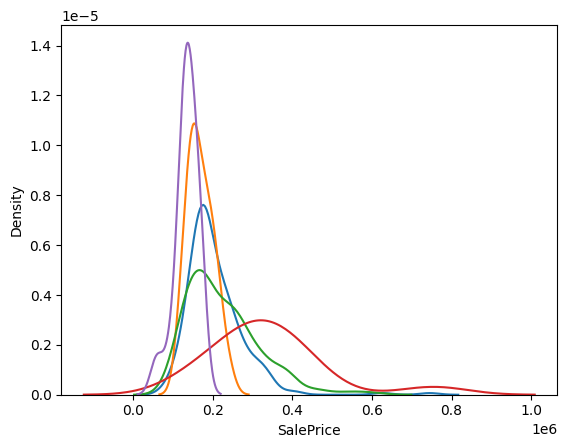

In [37]:
for category in X_train1['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train1[X_train1['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()